In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
data=pd.read_csv('dataset.csv')
data

,Kode Produk,19-Jan,19-Feb,19-Mar,19-Apr,19-May,19-Jun,19-Jul,19-Aug,19-Sep,...,20-Apr,20-May,20-Jun,20-Jul,20-Aug,20-Sep,20-Oct,20-Nov,20-Dec,Cluster
0,P1,56,7,8,14,16,10,21,20,68,...,17,6,9,62,67,62,67,77,11,0
1,P2,164,190,188,164,235,139,662,240,138,...,367,227,55,222,220,85,336,153,103,1
2,P3,65,58,79,109,50,51,73,92,28,...,121,23,30,26,19,23,21,20,7,0
3,P4,243,304,321,241,191,97,276,165,170,...,304,72,102,102,113,112,102,118,120,1
4,P5,10,13,24,14,28,9,19,10,24,...,16,11,7,10,16,18,18,23,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,P154,243,379,292,232,287,107,344,455,436,...,129,85,115,232,79,112,450,498,254,1
154,P155,-5,0,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155,P156,101,65,117,94,197,151,157,159,144,...,152,129,136,177,120,167,153,130,121,1
156,P157,0,0,0,0,0,8,49,93,103,...,19,26,29,49,43,34,51,51,43,0


In [4]:
len(data['Cluster'].unique())

5

In [5]:
#now lets take clusters
c0 = data.query("Cluster == 0")
print("Jumlah Produk:")
print(c0['Kode Produk'].size)
c1 = data.query("Cluster == 1")
print("Jumlah Produk:")
print(c1['Kode Produk'].size)
c2 = data.query("Cluster == 2")
print("Jumlah Produk:")
print(c2['Kode Produk'].size)
c3 = data.query("Cluster == 3")
print("Jumlah Produk:")
print(c3['Kode Produk'].size)
c4 = data.query("Cluster == 4")
print("Jumlah Produk:")
print(c4['Kode Produk'].size)

Jumlah Produk:
96
Jumlah Produk:
45
Jumlah Produk:
1
Jumlah Produk:
3
Jumlah Produk:
13


In [6]:
#oke ada ternyata yang cuman sendirian (1 product di cluster tersebut), kita beresin dia dulu, the easiest, dan biar keliatan kita
#ngapain aja di time series ini
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)
# ini fungsinya buat nge ubah dataset jadi windowed

# C2

In [7]:
#next kita ubah bentuk data nya dari yang tadinya kesamping jadi ke bawah, tapi pertama mau aku drop dulu cluster sama kode produknya
c2=c2.drop(columns=['Kode Produk','Cluster'])
c2

,19-Jan,19-Feb,19-Mar,19-Apr,19-May,19-Jun,19-Jul,19-Aug,19-Sep,19-Oct,...,20-Mar,20-Apr,20-May,20-Jun,20-Jul,20-Aug,20-Sep,20-Oct,20-Nov,20-Dec
79,4624,959,1500,4900,1812,2128,3913,5320,2657,4730,...,3682,3585,6316,2531,3752,2508,3637,3854,3951,3220


In [8]:
#next, buat dia kayak mejeneng time series seperti biasanya, which is datanya ke bawah, 
new_c2=[]
time=[]
for idx,_ in enumerate(c2):
    new_c2.append(c2.iloc[0,idx])
    time.append(idx)
print(time,new_c2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23] [4624, 959, 1500, 4900, 1812, 2128, 3913, 5320, 2657, 4730, 181, 2337, 2382, 1005, 3682, 3585, 6316, 2531, 3752, 2508, 3637, 3854, 3951, 3220]


In [9]:
#normalisasi, karena gap nya ada yang sampe ribuan, biar lebih gampang tugas ann nya
series=new_c2
min = np.min(series)
max = np.max(series)
series = series - min
series = series / (max-min)

# scaler = MinMaxScaler(feature_range=(0, 1))
# series = scaler.fit_transform(series)

time = np.array(time)

In [10]:
series

array([0.72420538, 0.12681337, 0.21499593, 0.76919315, 0.26585167,
       0.31735941, 0.60831296, 0.83765281, 0.40358598, 0.74148329,
       0.        , 0.35142624, 0.35876121, 0.13431133, 0.57066015,
       0.55484923, 1.        , 0.38304808, 0.58207009, 0.3792991 ,
       0.56332518, 0.59869601, 0.61450693, 0.49535452])

In [11]:
split_time = 3 # ini berapa bulan terkahir yang mau di potong buat pengujian?

time_train = time[:-split_time]
x_train =  series[:-split_time]
time_valid =  time[-split_time:]
x_valid =  series[-split_time:]

In [12]:
x_valid

array([0.59869601, 0.61450693, 0.49535452])

In [13]:
#buat data biar dibagi per window, jadi me masang masangkan waktu dan value,
window_size = 2
batch_size = 2
shuffle_buffer_size = 10

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
valid_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

In [14]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(2, input_shape=[None, 1]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(l1=0.01)),
        tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='relu')
    ])

    #the blstm part

In [15]:
#Using mae and mse
#model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),metrics=['mae'],loss='mse')
model.compile(optimizer=tf.keras.optimizers.Adam(),metrics=['mae'],loss='mse')
model.summary()
hist=model.fit(train_set,epochs=150,validation_data=valid_set, batch_size=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, None, 2)           4         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         34304     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              66560     
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               5

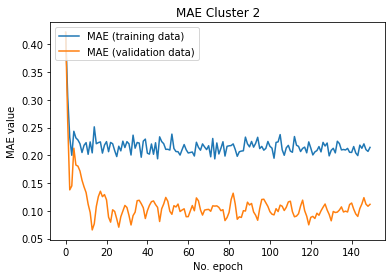

In [16]:
import matplotlib.pyplot as plt

plt.plot(hist.history['mae'], label='MAE (training data)')
plt.plot(hist.history['val_mae'], label='MAE (validation data)')

plt.title('MAE Cluster 2')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

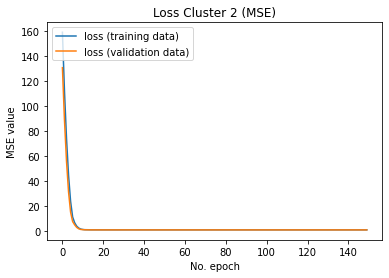

In [17]:
plt.plot(hist.history['loss'], label='loss (training data)')
plt.plot(hist.history['val_loss'], label='loss (validation data)')

plt.title("Loss Cluster 2 (MSE)")
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [18]:
prediksi=model.predict([21, 22, 23])
prediksi

array([[0.44324207],
       [0.44324207],
       [0.44324207]], dtype=float32)

In [19]:
prediksi=prediksi.flatten()

In [21]:
hasil=np.concatenate((series[:-split_time],prediksi))

In [22]:
hasil

array([0.72420538, 0.12681337, 0.21499593, 0.76919315, 0.26585167,
       0.31735941, 0.60831296, 0.83765281, 0.40358598, 0.74148329,
       0.        , 0.35142624, 0.35876121, 0.13431133, 0.57066015,
       0.55484923, 1.        , 0.38304808, 0.58207009, 0.3792991 ,
       0.56332518, 0.44324207, 0.44324207, 0.44324207])

[]

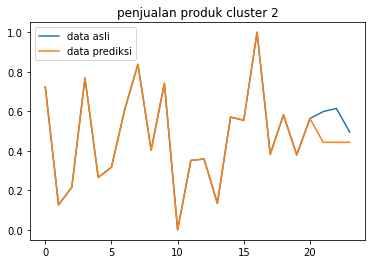

In [24]:
plt.plot(series,label='data asli')
plt.plot(hasil,label='data prediksi')
plt.title('penjualan produk cluster 2')
plt.legend()
plt.plot()

In [25]:
model.save('cluster2.h5')

# C0

In [26]:
## do the same for the others, tapi karena yang lain punya beberapa anggota, nah itu di average dulu per tanggalnya
c0=c0.drop(columns=['Kode Produk', 'Cluster'])


In [27]:
#next, buat dia kayak mejeneng time series seperti biasanya, which is datanya ke bawah, tapi di average per tanggal 
new_c0=[]
time=[]
for idx,a in enumerate(c0):
    new_c0.append(c0[a].mean())
    time.append(idx)


In [28]:
new_c0

[28.010416666666668,
 25.8125,
 26.0,
 24.8125,
 28.427083333333332,
 15.791666666666666,
 31.25,
 22.510416666666668,
 30.760416666666668,
 33.020833333333336,
 28.020833333333332,
 23.677083333333332,
 27.677083333333332,
 26.78125,
 26.270833333333332,
 19.114583333333332,
 11.395833333333334,
 13.270833333333334,
 20.385416666666668,
 22.083333333333332,
 21.53125,
 15.895833333333334,
 19.885416666666668,
 19.5625]

In [29]:
#normalisasi, karena gap nya ada yang sampe ribuan, biar lebih gampang tugas ann nya
series=new_c0
min = np.min(series)
max = np.max(series)
series = series - min
series = series / (max-min)
time = np.array(time)

In [30]:
series

array([0.76830443, 0.66666667, 0.67533719, 0.62042389, 0.78757225,
       0.20327553, 0.91811175, 0.51396917, 0.89547206, 1.        ,
       0.76878613, 0.56791908, 0.75289017, 0.71146435, 0.68786127,
       0.35693642, 0.        , 0.0867052 , 0.41570328, 0.49421965,
       0.46868979, 0.20809249, 0.39258189, 0.37764933])

In [31]:
split_time = 3 # ini berapa bulan terkahir yang mau di potong buat pengujian?

time_train = time[:-split_time]
x_train =  series[:-split_time]
time_valid =  time[-split_time:]
x_valid =  series[-split_time:]

In [32]:
x_valid

array([0.20809249, 0.39258189, 0.37764933])

In [33]:
#buat data biar dibagi per window, jadi me masang masangkan waktu dan value,
window_size = 2
batch_size = 2
shuffle_buffer_size = 10

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
valid_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

In [34]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(2, input_shape=[None, 1]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(l1=0.01)),
        tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='relu')
    ])

    #the blstm part

In [35]:
#Using mae and mse
model.compile(optimizer=tf.keras.optimizers.Adam(),metrics=['mae'],loss='mse')
model.summary()
hist=model.fit(valid_set,epochs=150,validation_data=train_set)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, None, 2)           4         
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 128)         34304     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                41216     
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              66560     
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)              

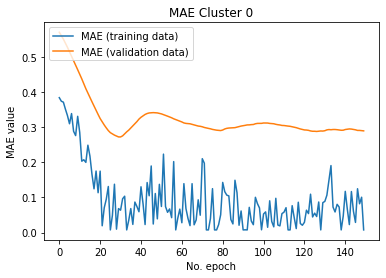

In [36]:
import matplotlib.pyplot as plt
plt.plot(hist.history['mae'], label='MAE (training data)')
plt.plot(hist.history['val_mae'], label='MAE (validation data)')

plt.title("MAE Cluster 0")
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

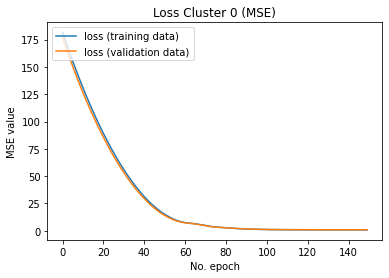

In [37]:
plt.plot(hist.history['loss'], label='loss (training data)')
plt.plot(hist.history['val_loss'], label='loss (validation data)')

plt.title("Loss Cluster 0 (MSE)")
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [45]:
prediksi=model.predict([21, 22, 23])
prediksi

array([[0.38345188],
       [0.38345188],
       [0.38345188]], dtype=float32)

In [46]:
prediksi=prediksi.flatten()

In [47]:
hasil=np.concatenate((series[:-split_time],prediksi))

In [48]:
hasil

array([0.76830443, 0.66666667, 0.67533719, 0.62042389, 0.78757225,
       0.20327553, 0.91811175, 0.51396917, 0.89547206, 1.        ,
       0.76878613, 0.56791908, 0.75289017, 0.71146435, 0.68786127,
       0.35693642, 0.        , 0.0867052 , 0.41570328, 0.49421965,
       0.46868979, 0.38345188, 0.38345188, 0.38345188])

[]

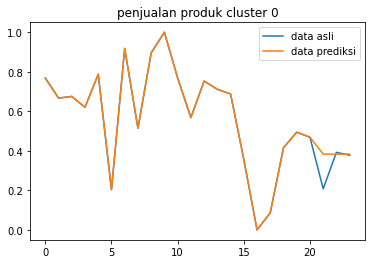

In [49]:
plt.plot(series,label='data asli')
plt.plot(hasil,label='data prediksi')
plt.title('penjualan produk cluster 0')
plt.legend()
plt.plot()

In [50]:
model.save('cluster0.h5')

# C1

In [7]:
## do the same for the others, tapi karena yang lain punya beberapa anggota, nah itu di average dulu per tanggalnya
c1=c1.drop(columns=['Kode Produk', 'Cluster'])

In [8]:
#next, buat dia kayak mejeneng time series seperti biasanya, which is datanya ke bawah, tapi di average per tanggal 
new_c1=[]
time=[]
for idx,a in enumerate(c1):
    new_c1.append(c1[a].mean())
    time.append(idx)


In [9]:
new_c1

[183.8,
 191.73333333333332,
 179.55555555555554,
 181.24444444444444,
 182.8,
 137.6888888888889,
 185.73333333333332,
 194.46666666666667,
 145.06666666666666,
 143.48888888888888,
 175.04444444444445,
 122.86666666666666,
 177.8,
 147.6,
 206.0222222222222,
 141.9111111111111,
 100.28888888888889,
 101.15555555555555,
 141.55555555555554,
 105.88888888888889,
 123.93333333333334,
 183.64444444444445,
 147.73333333333332,
 135.24444444444444]

In [10]:
#normalisasi, karena gap nya ada yang sampe ribuan, biar lebih gampang tugas ann nya
series=new_c1
min = np.min(series)
max = np.max(series)
series = series - min
series = series / (max-min)
time = np.array(time)

In [11]:
series

array([0.78982766, 0.86485918, 0.74968474, 0.76565784, 0.7803699 ,
       0.35372005, 0.80811265, 0.89071038, 0.42349727, 0.40857503,
       0.70701976, 0.2135351 , 0.73308113, 0.44745691, 1.        ,
       0.3936528 , 0.        , 0.00819672, 0.39029004, 0.05296343,
       0.22362337, 0.78835645, 0.44871795, 0.33060109])

In [12]:
split_time = 3 # ini berapa bulan terkahir yang mau di potong buat pengujian?

time_train = time[:-split_time]
x_train =  series[:-split_time]
time_valid =  time[-split_time:]
x_valid =  series[-split_time:]

In [13]:
x_valid

array([0.78835645, 0.44871795, 0.33060109])

In [14]:
#buat data biar dibagi per window, jadi me masang masangkan waktu dan value,
window_size = 2
batch_size = 2
shuffle_buffer_size = 10

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
valid_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

In [15]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(2, input_shape=[None, 1]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(l1=0.01)),
        tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='relu')
    ])

    #the blstm part

In [16]:
#Using mae and mse
model.compile(optimizer=tf.keras.optimizers.Adam(),metrics=['mae'],loss='mse')
model.summary()
hist=model.fit(valid_set,epochs=150,validation_data=train_set)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, None, 2)           4         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         34304     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              66560     
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               5

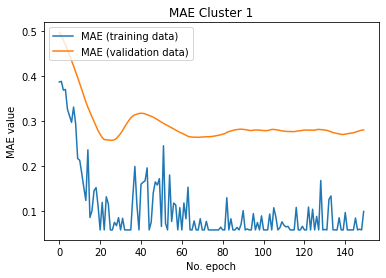

In [62]:
plt.plot(hist.history['mae'], label='MAE (training data)')
plt.plot(hist.history['val_mae'], label='MAE (validation data)')

plt.title("MAE Cluster 1")
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

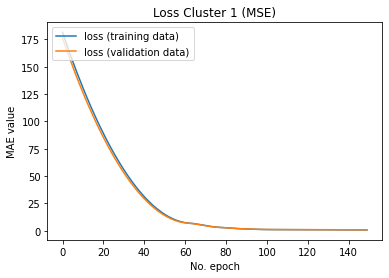

In [17]:
plt.plot(hist.history['loss'], label='loss (training data)')
plt.plot(hist.history['val_loss'], label='loss (validation data)')

plt.title("Loss Cluster 1 (MSE)")
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [64]:
prediksi=model.predict([21, 22, 23])
prediksi

array([[0.35709003],
       [0.35709006],
       [0.35709006]], dtype=float32)

In [65]:
prediksi=prediksi.flatten()

In [66]:
hasil=np.concatenate((series[:-split_time],prediksi))

In [67]:
hasil

array([0.78982766, 0.86485918, 0.74968474, 0.76565784, 0.7803699 ,
       0.35372005, 0.80811265, 0.89071038, 0.42349727, 0.40857503,
       0.70701976, 0.2135351 , 0.73308113, 0.44745691, 1.        ,
       0.3936528 , 0.        , 0.00819672, 0.39029004, 0.05296343,
       0.22362337, 0.35709003, 0.35709006, 0.35709006])

[]

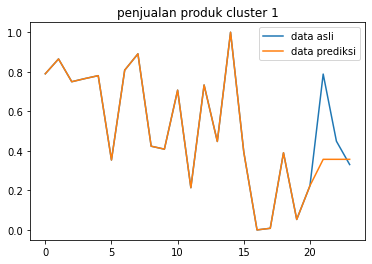

In [69]:
#data prediksi
plt.plot(series,label='data asli')
plt.plot(hasil,label='data prediksi')
plt.title('penjualan produk cluster 1')
plt.legend()
plt.plot()

In [18]:
model.save('cluster1.h5')

# C3

In [70]:
## do the same for the others, tapi karena yang lain punya beberapa anggota, nah itu di average dulu per tanggalnya
c3=c3.drop(columns=['Kode Produk', 'Cluster'])

In [71]:
#next, buat dia kayak mejeneng time series seperti biasanya, which is datanya ke bawah, tapi di average per tanggal 
new_c3=[]
time=[]
for idx,a in enumerate(c3):
    new_c3.append(c3[a].mean())
    time.append(idx)

In [72]:
new_c3

[1844.6666666666667,
 2857.0,
 2156.6666666666665,
 2060.6666666666665,
 2336.3333333333335,
 2655.3333333333335,
 2044.0,
 2490.6666666666665,
 1824.3333333333333,
 2065.3333333333335,
 2837.3333333333335,
 1107.0,
 138.66666666666666,
 113.33333333333333,
 68.0,
 44.333333333333336,
 194.66666666666666,
 68.0,
 74.66666666666667,
 91.66666666666667,
 145.66666666666666,
 110.0,
 114.0,
 64.66666666666667]

In [73]:
#normalisasi, karena gap nya ada yang sampe ribuan, biar lebih gampang tugas ann nya
series=new_c3
min = np.min(series)
max = np.max(series)
series = series - min
series = series / (max-min)
time = np.array(time)

In [75]:
series

array([0.64008059, 1.        , 0.75100735, 0.71687604, 0.81488504,
       0.92830055, 0.71095046, 0.86975587, 0.63285139, 0.7185352 ,
       0.99300782, 0.37781465, 0.03353875, 0.02453188, 0.00841432,
       0.        , 0.05344868, 0.00841432, 0.01078455, 0.01682863,
       0.03602749, 0.02334676, 0.0247689 , 0.0072292 ])

In [74]:
split_time = 3 # ini berapa bulan terkahir yang mau di potong buat pengujian?

time_train = time[:-split_time]
x_train =  series[:-split_time]
time_valid =  time[-split_time:]
x_valid =  series[-split_time:]

In [76]:
x_valid

array([0.02334676, 0.0247689 , 0.0072292 ])

In [80]:
#buat data biar dibagi per window, jadi me masang masangkan waktu dan value,
window_size = 2
batch_size = 2
shuffle_buffer_size = 10

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
valid_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

In [81]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(2, input_shape=[None, 1]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(l1=0.01)),
        tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='relu')
    ])

    #the blstm part

In [84]:
#Using mae and mse
#model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),metrics=['mae'],loss='mse')
model.compile(optimizer=tf.keras.optimizers.Adam(),metrics=['mae'],loss='mse')
model.summary()
hist=model.fit(train_set,epochs=150,validation_data=valid_set, batch_size=1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, None, 2)           4         
_________________________________________________________________
bidirectional_8 (Bidirection (None, None, 128)         34304     
_________________________________________________________________
bidirectional_9 (Bidirection (None, 64)                41216     
_________________________________________________________________
flatten_4 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 1024)              66560     
_________________________________________________________________
dropout_8 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)              

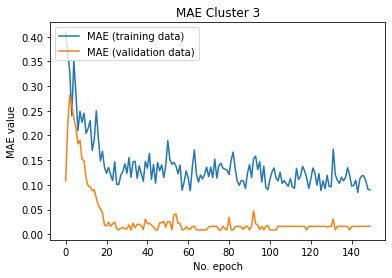

In [85]:
plt.plot(hist.history['mae'], label='MAE (training data)')
plt.plot(hist.history['val_mae'], label='MAE (validation data)')

plt.title('MAE Cluster 3')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

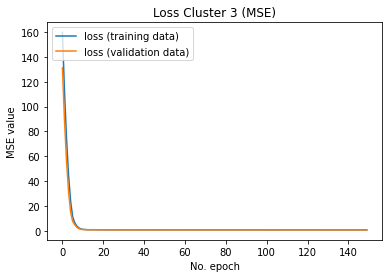

In [86]:
plt.plot(hist.history['loss'], label='loss (training data)')
plt.plot(hist.history['val_loss'], label='loss (validation data)')

plt.title("Loss Cluster 3 (MSE)")
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [87]:
prediksi=model.predict([21, 22, 23])
prediksi

array([[0.5219645 ],
       [0.52231556],
       [0.52258307]], dtype=float32)

In [88]:
prediksi=prediksi.flatten()

In [89]:
hasil=np.concatenate((series[:-split_time],prediksi))

In [90]:
hasil

array([0.64008059, 1.        , 0.75100735, 0.71687604, 0.81488504,
       0.92830055, 0.71095046, 0.86975587, 0.63285139, 0.7185352 ,
       0.99300782, 0.37781465, 0.03353875, 0.02453188, 0.00841432,
       0.        , 0.05344868, 0.00841432, 0.01078455, 0.01682863,
       0.03602749, 0.52196449, 0.52231556, 0.52258307])

[]

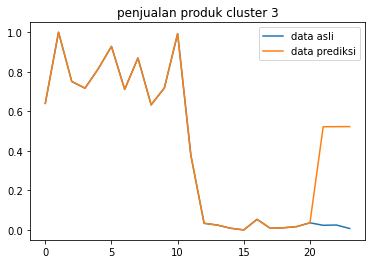

In [92]:
plt.plot(series,label='data asli')
plt.plot(hasil,label='data prediksi')
plt.title('penjualan produk cluster 3')
plt.legend()
plt.plot()

In [93]:
model.save('cluster3.h5')

# C4

In [94]:
## do the same for the others, tapi karena yang lain punya beberapa anggota, nah itu di average dulu per tanggalnya
c4=c4.drop(columns=['Kode Produk', 'Cluster'])

In [95]:
#next, buat dia kayak mejeneng time series seperti biasanya, which is datanya ke bawah, tapi di average per tanggal 
new_c4=[]
time=[]
for idx,a in enumerate(c4):
    new_c4.append(c4[a].mean())
    time.append(idx)


In [96]:
new_c4

[623.6923076923077,
 673.3846153846154,
 625.0,
 588.9230769230769,
 791.6923076923077,
 510.2307692307692,
 679.3846153846154,
 602.4615384615385,
 666.4615384615385,
 643.4615384615385,
 663.0,
 555.6153846153846,
 1338.2307692307693,
 1224.076923076923,
 1327.2307692307693,
 1021.3846153846154,
 797.8461538461538,
 1000.7692307692307,
 1287.8461538461538,
 1209.3076923076924,
 1329.7692307692307,
 1436.923076923077,
 1577.3076923076924,
 1175.3846153846155]

In [97]:
#normalisasi, karena gap nya ada yang sampe ribuan, biar lebih gampang tugas ann nya
series=new_c4
min = np.min(series)
max = np.max(series)
series = series - min
series = series / (max-min)
time = np.array(time)

In [98]:
series

array([0.1063293 , 0.15289792, 0.10755479, 0.07374567, 0.26376874,
       0.        , 0.15852076, 0.0864331 , 0.14641003, 0.12485582,
       0.14316609, 0.04253172, 0.77595156, 0.66897347, 0.76564302,
       0.47902249, 0.26953576, 0.459703  , 0.72873414, 0.65513264,
       0.76802191, 0.86844002, 1.        , 0.62334198])

In [99]:
split_time = 3 # ini berapa bulan terkahir yang mau di potong buat pengujian?

time_train = time[:-split_time]
x_train =  series[:-split_time]
time_valid =  time[-split_time:]
x_valid =  series[-split_time:]

In [100]:
x_valid

array([0.86844002, 1.        , 0.62334198])

In [101]:
#buat data biar dibagi per window, jadi me masang masangkan waktu dan value,
window_size = 2
batch_size = 2
shuffle_buffer_size = 10

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
valid_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

In [102]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(2, input_shape=[None, 1]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(l1=0.01)),
        tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='relu')
    ])

    #the blstm part

In [103]:
#Using mae and mse
#model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),metrics=['mae'],loss='mse')
model.compile(optimizer=tf.keras.optimizers.Adam(),metrics=['mae'],loss='mse')
model.summary()
hist=model.fit(train_set,epochs=150,validation_data=valid_set, batch_size=1)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, None, 2)           4         
_________________________________________________________________
bidirectional_10 (Bidirectio (None, None, 128)         34304     
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 64)                41216     
_________________________________________________________________
flatten_5 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 1024)              66560     
_________________________________________________________________
dropout_10 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 512)              

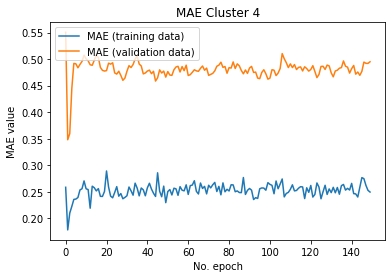

In [105]:
plt.plot(hist.history['mae'], label='MAE (training data)')
plt.plot(hist.history['val_mae'], label='MAE (validation data)')

plt.title('MAE Cluster 4')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

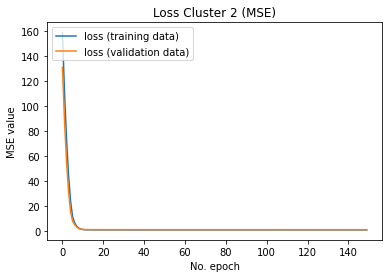

In [106]:
plt.plot(hist.history['loss'], label='loss (training data)')
plt.plot(hist.history['val_loss'], label='loss (validation data)')

plt.title("Loss Cluster 2 (MSE)")
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [112]:
prediksi=model.predict([21, 22, 23])
prediksi

array([[0.31667897],
       [0.31667897],
       [0.31667897]], dtype=float32)

In [113]:
prediksi=prediksi.flatten()

In [114]:
hasil=np.concatenate((series[:-split_time],prediksi))

In [115]:
hasil

array([0.1063293 , 0.15289792, 0.10755479, 0.07374567, 0.26376874,
       0.        , 0.15852076, 0.0864331 , 0.14641003, 0.12485582,
       0.14316609, 0.04253172, 0.77595156, 0.66897347, 0.76564302,
       0.47902249, 0.26953576, 0.459703  , 0.72873414, 0.65513264,
       0.76802191, 0.31667897, 0.31667897, 0.31667897])

[]

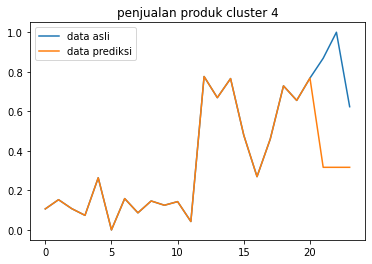

In [116]:
plt.plot(series,label='data asli')
plt.plot(hasil,label='data prediksi')
plt.title('penjualan produk cluster 4')
plt.legend()
plt.plot()

In [117]:
model.save('culster4.h0')

INFO:tensorflow:Assets written to: culster4.h0\assets


INFO:tensorflow:Assets written to: culster4.h0\assets
